# TEXT PREDICTION

### Import Data From Kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download -d vetrirah/janatahack-independence-day-2020-ml-hackathon

  0% 0.00/11.4M [00:00<?, ?B/s]
100% 11.4M/11.4M [00:00<00:00, 133MB/s]


In [ ]:
! unzip /content/janatahack-independence-day-2020-ml-hackathon.zip

Archive:  /content/janatahack-independence-day-2020-ml-hackathon.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Import Library

In [ ]:
!pip install simpletransformers
!pip install scikit-multilearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from simpletransformers.classification import MultiLabelClassificationModel
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Data Exploration

In [ ]:
dataset = pd.read_csv('/content/train.csv')

In [ ]:
dataset.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
dataset.tail()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0
20971,20972,Why optional stopping is a problem for Bayesians,"Recently, optional stopping has been a subje...",0,0,1,1,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [ ]:
dataset.isnull().sum()

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

In [ ]:
dataset.shape

(20972, 9)

## Data Visualization

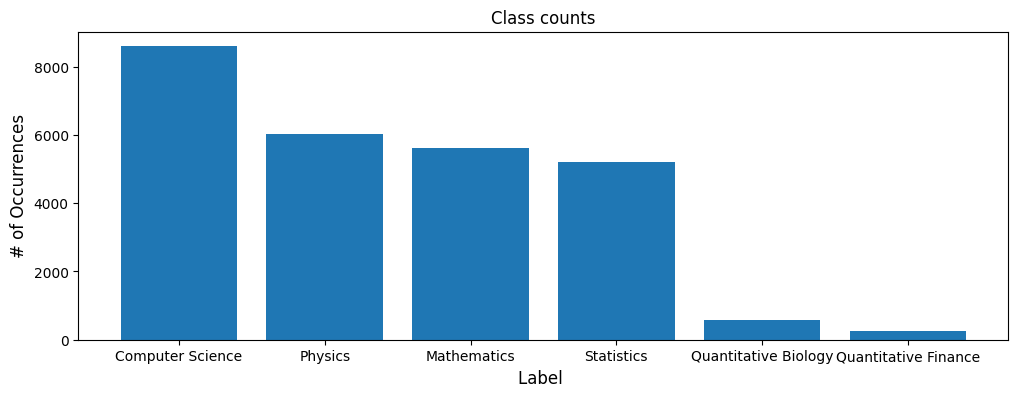

In [ ]:
subject_dataset = dataset.drop(['ID', 'TITLE', 'ABSTRACT'], axis=1)

column_names = subject_dataset.columns
X_axis = range(len(column_names))

plt.figure(figsize=(12, 4))
plt.bar(X_axis, dataset.drop(['ID', 'TITLE', 'ABSTRACT'], axis=1).sum())
plt.xticks(X_axis, column_names)
plt.title("Class counts")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)

plt.show()

## Data Preparation / Data Cleaning

In [ ]:
dataset = dataset.sample(15000)

In [ ]:
dataset.set_index('ID')
dataset['Text']=dataset['TITLE']+' '+dataset['ABSTRACT']
dataset.drop(columns=['TITLE','ABSTRACT'], inplace=True)
dataset.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Text
5915,5916,0,1,0,0,0,0,High Contrast Observations of Bright Stars wit...
11801,11802,0,1,0,0,0,0,Voyager 1 Measurements Beyond the Heliopause o...
1553,1554,0,0,1,0,0,0,Estimates for maximal functions associated to ...
16071,16072,1,0,1,1,0,0,Coalescent-based species tree estimation: a st...
5045,5046,0,0,1,0,0,0,Timelike surfaces in Minkowski space with a ca...


In [ ]:
stop = stopwords.words('english')
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

def Cleaning(df, text_field, New_Text):
    # Ubah ke Lowercase
    df[New_Text] = df[text_field].str.casefold()
    # Remove Punctuation
    df[New_Text] = df[New_Text].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # Remove Number
    df[New_Text] = df[New_Text].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[New_Text] = df[New_Text].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    # Do Tokenization
    df[New_Text] = df[New_Text].apply(lambda x: word_tokenize(x))
    # DO Lemmatization
    df[New_Text] = df[New_Text].apply(lambda x: word_lemmatizer(x))
    df[New_Text] = df[New_Text].apply(lambda x: ' '.join(x))

    return df

In [ ]:
dataset = Cleaning(dataset, 'Text', 'Clean_Text')
dataset.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Text,Clean_Text
5915,5916,0,1,0,0,0,0,High Contrast Observations of Bright Stars wit...,high contrast observation bright star starshad...
11801,11802,0,1,0,0,0,0,Voyager 1 Measurements Beyond the Heliopause o...,voyager measurement beyond heliopause galactic...
1553,1554,0,0,1,0,0,0,Estimates for maximal functions associated to ...,estimate maximal function associated hypersurf...
16071,16072,1,0,1,1,0,0,Coalescent-based species tree estimation: a st...,coalescentbased specie tree estimation stochas...
5045,5046,0,0,1,0,0,0,Timelike surfaces in Minkowski space with a ca...,timelike surface minkowski space canonical nul...


In [ ]:
dataset = dataset[['Clean_Text', 'Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]
dataset.head()

,Clean_Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
5915,high contrast observation bright star starshad...,0,1,0,0,0,0
11801,voyager measurement beyond heliopause galactic...,0,1,0,0,0,0
1553,estimate maximal function associated hypersurf...,0,0,1,0,0,0
16071,coalescentbased specie tree estimation stochas...,1,0,1,1,0,0
5045,timelike surface minkowski space canonical nul...,0,0,1,0,0,0


In [ ]:
dataset['Labels'] = dataset.apply(lambda x: list([x['Computer Science'], x['Physics'], x['Mathematics'], x['Statistics'], x['Quantitative Biology'], x['Quantitative Finance']]),axis=1)
dataset.head()

,Clean_Text,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Labels
5915,high contrast observation bright star starshad...,0,1,0,0,0,0,"[0, 1, 0, 0, 0, 0]"
11801,voyager measurement beyond heliopause galactic...,0,1,0,0,0,0,"[0, 1, 0, 0, 0, 0]"
1553,estimate maximal function associated hypersurf...,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]"
16071,coalescentbased specie tree estimation stochas...,1,0,1,1,0,0,"[1, 0, 1, 1, 0, 0]"
5045,timelike surface minkowski space canonical nul...,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]"


In [ ]:
train_dataset = dataset[['Clean_Text','Labels']]
train_dataset.head()

,Clean_Text,Labels
5915,high contrast observation bright star starshad...,"[0, 1, 0, 0, 0, 0]"
11801,voyager measurement beyond heliopause galactic...,"[0, 1, 0, 0, 0, 0]"
1553,estimate maximal function associated hypersurf...,"[0, 0, 1, 0, 0, 0]"
16071,coalescentbased specie tree estimation stochas...,"[1, 0, 1, 1, 0, 0]"
5045,timelike surface minkowski space canonical nul...,"[0, 0, 1, 0, 0, 0]"


In [ ]:
X = dataset['Clean_Text']
y = dataset.drop(labels = ['Clean_Text', 'Labels'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF

In [ ]:
def tfidf_features(X_train, X_test):
    """
        X_train, X_test — samples
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    # Fit the vectorizer on the train set
    # Transform the train, test set and return the result


    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, token_pattern='(\S+)')

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf, tfidf_vectorizer.vocabulary_

X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}
X_train_tfidf.shape, X_test_tfidf.shape

((12000, 25605), (3000, 25605))

### Binary Relevance with TF-IDF Vector

In [ ]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(X_train_tfidf, y_train)
# predict
predictions = classifier.predict(X_test_tfidf)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.5186666666666667


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1208
           1       0.85      0.77      0.81       886
           2       0.85      0.59      0.70       808
           3       0.60      0.55      0.58       774
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00        34

   micro avg       0.74      0.68      0.71      3790
   macro avg       0.50      0.46      0.47      3790
weighted avg       0.73      0.68      0.70      3790
 samples avg       0.71      0.72      0.69      3790



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0: Computer Science

1: Physics

2: Mathematics

3: Statistics

4: Quantitative Biology

5: Quantitative Finance

### Classifier Chains with TF-IDF Vector

In [ ]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_tfidf, y_train)
# predict
predictions2 = classifier.predict(X_test_tfidf)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions2))
print("\n")

Accuracy =  0.674




In [ ]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1208
           1       0.93      0.83      0.88       886
           2       0.83      0.78      0.80       808
           3       0.83      0.68      0.75       774
           4       0.39      0.30      0.34        80
           5       0.59      0.29      0.39        34

   micro avg       0.84      0.77      0.80      3790
   macro avg       0.73      0.62      0.66      3790
weighted avg       0.84      0.77      0.80      3790
 samples avg       0.85      0.81      0.81      3790



### Modelling

In [ ]:
# Create a MultiLabelClassificationModel
model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=6,
    args={
        'reprocess_input_data': True,
        'overwrite_output_dir': True,
        'num_train_epochs': 5
        }
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'roberta.pooler.dense.bias', 'classifier.dense.bias', 'c

In [ ]:
model.train_model(train_dataset)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/15000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1875 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1875 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1875 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1875 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1875 [00:00<?, ?it/s]

(9375, 0.1674624370505909)

In [ ]:
test_dataset = pd.read_csv("/content/test.csv")
test_dataset['Text'] = test_dataset['TITLE'] + test_dataset['ABSTRACT']

In [ ]:
test_dataset.set_index('ID', inplace = True)
test_dataset.head()

,TITLE,ABSTRACT,Text
ID,,,
20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,Closed-form Marginal Likelihood in Gamma-Poiss...
20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,Laboratory mid-IR spectra of equilibrated and ...
20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,Case For Static AMSDU Aggregation in WLANs Fr...
20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,The $Gaia$-ESO Survey: the inner disk intermed...
20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,Witness-Functions versus Interpretation-Functi...


In [ ]:
test_dataset = Cleaning(test_dataset, 'Text', 'Clean_Text')

In [ ]:
test_dataset.head()

,TITLE,ABSTRACT,Text,Clean_Text
ID,,,,
20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,Closed-form Marginal Likelihood in Gamma-Poiss...,closedform marginal likelihood gammapoisson ma...
20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,Laboratory mid-IR spectra of equilibrated and ...,laboratory midir spectrum equilibrated igneous...
20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,Case For Static AMSDU Aggregation in WLANs Fr...,case static amsdu aggregation wlan frame aggre...
20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,The $Gaia$-ESO Survey: the inner disk intermed...,gaiaeso survey inner disk intermediateage open...
20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,Witness-Functions versus Interpretation-Functi...,witnessfunctions versus interpretationfunction...


In [ ]:
test_dataset = test_dataset[['Clean_Text']]
test_dataset.head()

,Clean_Text
ID,
20973,closedform marginal likelihood gammapoisson ma...
20974,laboratory midir spectrum equilibrated igneous...
20975,case static amsdu aggregation wlan frame aggre...
20976,gaiaeso survey inner disk intermediateage open...
20977,witnessfunctions versus interpretationfunction...


In [ ]:
test_dataset.shape

(8989, 1)

In [ ]:
Predict = test_dataset.Clean_Text.tolist()

In [ ]:
predictions, raw_outputs = model.predict(Predict)

  0%|          | 0/8989 [00:00<?, ?it/s]

  0%|          | 0/1124 [00:00<?, ?it/s]

In [ ]:
test_dataset['predictions'] = predictions

In [ ]:
test_dataset[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']] = pd.DataFrame(test_dataset['predictions'].tolist(), index= test_dataset.index)

In [ ]:
test_dataset.head()

,Clean_Text,predictions,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,,,
20973,closedform marginal likelihood gammapoisson ma...,"[0, 0, 0, 1, 0, 0]",0,0,0,1,0,0
20974,laboratory midir spectrum equilibrated igneous...,"[0, 1, 0, 0, 0, 0]",0,1,0,0,0,0
20975,case static amsdu aggregation wlan frame aggre...,"[1, 0, 0, 0, 0, 0]",1,0,0,0,0,0
20976,gaiaeso survey inner disk intermediateage open...,"[0, 1, 0, 0, 0, 0]",0,1,0,0,0,0
20977,witnessfunctions versus interpretationfunction...,"[1, 0, 0, 0, 0, 0]",1,0,0,0,0,0
